In [20]:
#Cell_1.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf

from sklearn.preprocessing import scale
from sklearn.metrics import mean_squared_error


plt.rcParams['font.family'] = 'Noto Serif CJK JP'

In [21]:
#Cell_2.
csv_in="8306_2018.csv"
df=pd.read_csv(csv_in,skiprows=1,header=0,delimiter=',',encoding="shift-jis")
print(df.shape) #確認
print(df.head()) #確認
print(type(df['日付'][0]))
df['日付']=pd.to_datetime(df['日付'])
print(type(df['日付'][0]))

(105, 7)
           日付     始値     高値     安値     終値       出来高  終値調整値
0  2018-01-04  841.5  847.3  838.5  847.1  81329100  847.1
1  2018-01-05  857.9  870.0  857.9  866.8  98933500  866.8
2  2018-01-09  876.0  877.3  859.3  863.4  72297900  863.4
3  2018-01-10  871.0  880.8  870.2  876.8  79009900  876.8
4  2018-01-11  880.0  883.0  872.5  881.9  72964800  881.9
<class 'str'>
<class 'pandas._libs.tslibs.timestamps.Timestamp'>


In [22]:
#Cell_3.
df_d=df.copy()
df_d['日付']-=df_d['日付'][0]
print(type(df_d['日付'][0]))
df_d['日付']/=np.timedelta64(1,'D')
print(type(df_d['日付'][0]))
print(df_d.head())

<class 'pandas._libs.tslibs.timedeltas.Timedelta'>
<class 'numpy.float64'>
    日付     始値     高値     安値     終値       出来高  終値調整値
0  0.0  841.5  847.3  838.5  847.1  81329100  847.1
1  1.0  857.9  870.0  857.9  866.8  98933500  866.8
2  5.0  876.0  877.3  859.3  863.4  72297900  863.4
3  6.0  871.0  880.8  870.2  876.8  79009900  876.8
4  7.0  880.0  883.0  872.5  881.9  72964800  881.9


In [23]:
#Cell_4.
df_d['week']=0
print(df_d.shape)
display(df_d.head())

(105, 8)


,日付,始値,高値,安値,終値,出来高,終値調整値,week
0,0.0,841.5,847.3,838.5,847.1,81329100,847.1,0
1,1.0,857.9,870.0,857.9,866.8,98933500,866.8,0
2,5.0,876.0,877.3,859.3,863.4,72297900,863.4,0
3,6.0,871.0,880.8,870.2,876.8,79009900,876.8,0
4,7.0,880.0,883.0,872.5,881.9,72964800,881.9,0


In [24]:
#Cell_5.
df_d['week'] = df_d['日付']//7 + 1

In [25]:
#Cell_6.
display(df_d.head())
display(df_d.tail())

,日付,始値,高値,安値,終値,出来高,終値調整値,week
0,0.0,841.5,847.3,838.5,847.1,81329100,847.1,1.0
1,1.0,857.9,870.0,857.9,866.8,98933500,866.8,1.0
2,5.0,876.0,877.3,859.3,863.4,72297900,863.4,1.0
3,6.0,871.0,880.8,870.2,876.8,79009900,876.8,1.0
4,7.0,880.0,883.0,872.5,881.9,72964800,881.9,2.0


,日付,始値,高値,安値,終値,出来高,終値調整値,week
100,152.0,685.0,685.3,675.4,680.1,43955200,680.1,22.0
101,153.0,675.1,679.7,671.1,672.9,57744500,672.9,22.0
102,154.0,684.5,689.9,680.4,682.3,62401100,682.3,23.0
103,155.0,676.4,682.9,675.7,676.5,62647100,676.5,23.0
104,158.0,674.2,682.6,672.1,676.7,43171000,676.7,23.0


In [26]:
#Cell_7.
#Extract 2018 and onward.
interest = pd.read_csv('d1-5-5.csv',skiprows=525,encoding='cp932')
display(interest.head())

,Unnamed: 0,1.5,0,-0.06,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26,Unnamed: 27,Unnamed: 28
0,18.0,1.5,0,-0.04,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,1.5,0,-0.03,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,1.5,0,-0.04,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,1.5,0,-0.04,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,1.5,0,-0.04,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [27]:
#Cell_8.
interest=interest.iloc[:,0:4]
interest.columns=['week','US','EUR','JP']
display(interest.head())
print(interest.info())
for i in range(23):
    interest.loc[i,'week']=i+1
display(interest.head(23))


,week,US,EUR,JP
0,18.0,1.5,0,-0.04
1,NaN,1.5,0,-0.03
2,NaN,1.5,0,-0.04
3,NaN,1.5,0,-0.04
4,NaN,1.5,0,-0.04


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77 entries, 0 to 76
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   week    2 non-null      float64
 1   US      77 non-null     float64
 2   EUR     77 non-null     int64  
 3   JP      77 non-null     float64
dtypes: float64(3), int64(1)
memory usage: 2.5 KB
None


,week,US,EUR,JP
0,1.0,1.50,0,-0.04
1,2.0,1.50,0,-0.03
2,3.0,1.50,0,-0.04
3,4.0,1.50,0,-0.04
4,5.0,1.50,0,-0.04
5,6.0,1.50,0,-0.03
6,7.0,1.50,0,-0.04
7,8.0,1.50,0,-0.05
8,9.0,1.50,0,-0.05
9,10.0,1.50,0,-0.06


In [28]:
#Cell_9.
interest2 = interest.iloc[0:23,:]
display(interest2)

,week,US,EUR,JP
0,1.0,1.50,0,-0.04
1,2.0,1.50,0,-0.03
2,3.0,1.50,0,-0.04
3,4.0,1.50,0,-0.04
4,5.0,1.50,0,-0.04
5,6.0,1.50,0,-0.03
6,7.0,1.50,0,-0.04
7,8.0,1.50,0,-0.05
8,9.0,1.50,0,-0.05
9,10.0,1.50,0,-0.06


In [29]:
#Cell_10.
df2= pd.merge(df_d,interest2,on='week',how='left')
display(df2.head())
display(df2.tail())

,日付,始値,高値,安値,終値,出来高,終値調整値,week,US,EUR,JP
0,0.0,841.5,847.3,838.5,847.1,81329100,847.1,1.0,1.5,0,-0.04
1,1.0,857.9,870.0,857.9,866.8,98933500,866.8,1.0,1.5,0,-0.04
2,5.0,876.0,877.3,859.3,863.4,72297900,863.4,1.0,1.5,0,-0.04
3,6.0,871.0,880.8,870.2,876.8,79009900,876.8,1.0,1.5,0,-0.04
4,7.0,880.0,883.0,872.5,881.9,72964800,881.9,2.0,1.5,0,-0.03


,日付,始値,高値,安値,終値,出来高,終値調整値,week,US,EUR,JP
100,152.0,685.0,685.3,675.4,680.1,43955200,680.1,22.0,1.75,0,-0.07
101,153.0,675.1,679.7,671.1,672.9,57744500,672.9,22.0,1.75,0,-0.07
102,154.0,684.5,689.9,680.4,682.3,62401100,682.3,23.0,1.75,0,-0.07
103,155.0,676.4,682.9,675.7,676.5,62647100,676.5,23.0,1.75,0,-0.07
104,158.0,674.2,682.6,672.1,676.7,43171000,676.7,23.0,1.75,0,-0.07


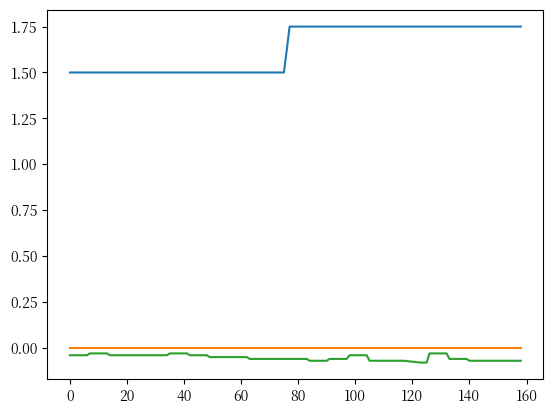

In [30]:
#Cell_11.
plt.plot(df2['日付'],df2['US'])
plt.plot(df2['日付'],df2['EUR'])
plt.plot(df2['日付'],df2['JP'])
plt.show()

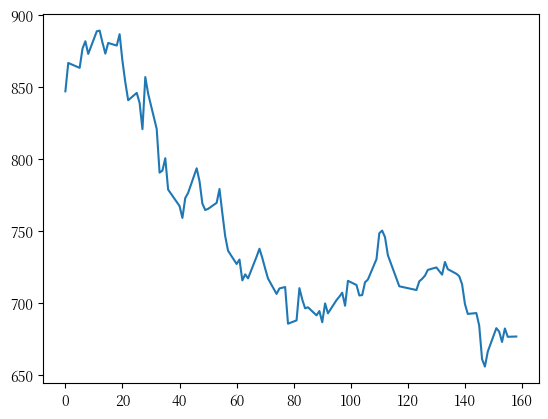

In [31]:
#Cell_12.
plt.plot(df2['日付'],df2['終値'])
plt.show()

In [32]:
#Cell_13.
X = df2[['日付','出来高','US','JP']]
Y = df2[['終値']]

In [33]:
#Cell_14.
X_c=sm.add_constant(X)
model=sm.OLS(Y,X_c)

In [34]:
#Cell_15.
results=model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                     終値   R-squared:                       0.761
Model:                            OLS   Adj. R-squared:                  0.752
Method:                 Least Squares   F-statistic:                     79.67
Date:                Thu, 24 Oct 2024   Prob (F-statistic):           3.15e-30
Time:                        00:51:16   Log-Likelihood:                -512.60
No. Observations:                 105   AIC:                             1035.
Df Residuals:                     100   BIC:                             1048.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        823.0539     75.011     10.972      0.0

In [35]:
#Cell_16.
X_dumm=X.copy()
X_scaled_ar = scale(X_dumm)
y_scaled_ar = scale(Y)

In [36]:
#Cell_17.
model = sm.OLS(y_scaled_ar, X_scaled_ar)
results_scaled = model.fit()
print(results_scaled.summary())

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.761
Model:                            OLS   Adj. R-squared (uncentered):              0.752
Method:                 Least Squares   F-statistic:                              80.46
Date:                Thu, 24 Oct 2024   Prob (F-statistic):                    1.56e-30
Time:                        00:51:16   Log-Likelihood:                         -73.814
No. Observations:                 105   AIC:                                      155.6
Df Residuals:                     101   BIC:                                      166.2
Df Model:                           4                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [37]:
#Cell_18.
X_test = pd.DataFrame([[1,180, 9*(10**6), 2.0, 0.001],
                       [1,365, 9*(10**6), 2.0, 0.1],
                       [1,250, 5*(10**5), 2.5, 0.25],
                        ],
                        columns=X_c.columns)  # example
print('X for prediction:')
display(X_test)

X for prediction:


,const,日付,出来高,US,JP
0,1,180,9000000,2.0,0.001
1,1,365,9000000,2.0,0.100
2,1,250,500000,2.5,0.250


In [38]:
#Cell_19.
#X_test_c = sm.add_constant(X_test)
y_test = results.predict(X_test)
print('Predicted y:')
print(y_test)

Predicted y:
0    694.803484
1    588.903455
2    866.038446
dtype: float64
